In [178]:
from datetime import timedelta

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# read in data which have only rfm features
orders = pd.read_csv('./data/olist_orders_dataset.csv')
payments = pd.read_csv('./data/olist_order_payments_dataset.csv')

In [4]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [7]:
payments.dtypes

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

In [9]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12,2018-01-25 23:32:54,2018-02-15 00:00:00


In [10]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [11]:
orders = orders.dropna(subset=['order_delivered_carrier_date'])

In [12]:
# We'll be taking the recent day plus 1 day as the present date for the rfm analysis
recent_date = orders['order_delivered_carrier_date'].max() + timedelta(days=1)
recent_date

Timestamp('2018-09-12 00:00:00')

In [13]:
merged_data = orders.merge(payments, how='inner', on=['order_id'])

In [14]:
# form the rfm dataframe by grouping by customer id and using aggregations
rfm_df = merged_data.groupby('customer_id').agg(
    recency=('order_delivered_carrier_date', lambda x: (recent_date - x.max()).days),
    frequency=('payment_sequential', 'count'),
    monetary=('payment_value', 'sum'))

In [15]:
rfm_df.head()

,recency,frequency,monetary
customer_id,,,
00012a2ce6f8dcda20d059ce98491703,299,1,114.74
000161a058600d5901f007fab4c27140,420,1,67.41
0001fd6190edaaf884bcaf3d49edf079,560,1,195.42
0002414f95344307404f0ace7a26f1d5,389,1,179.35
000379cdec625522490c315e70c7a9fb,161,1,107.01


In [16]:
rfm_df.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,97657.0,250.736015,152.680372,1.00,127.00,231.00,362.00,704.00
frequency,97657.0,1.044451,0.378738,1.00,1.00,1.00,1.00,29.00
monetary,97657.0,159.826284,218.553900,9.59,61.93,105.28,176.26,13664.08


### Recency

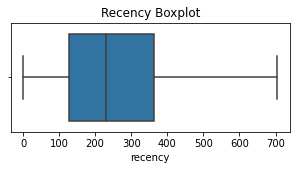

In [17]:
plt.figure(figsize=(5, 2))
sns.boxplot(x='recency', data=rfm_df)
plt.title('Recency Boxplot');

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18368\1708809018.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_df.recency,  bins = 55);


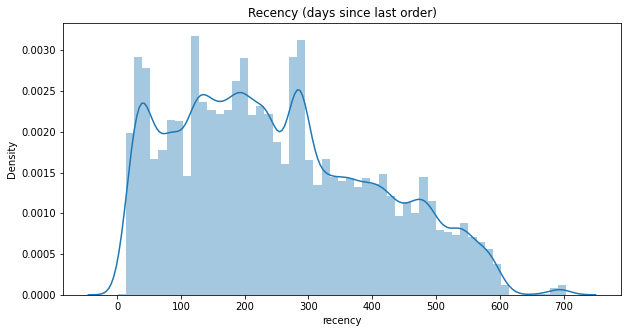

In [18]:
plt.figure(figsize=(10, 5))
plt.title('Recency (days since last order)')
sns.distplot(rfm_df.recency, bins=55);

Looking at the distributions, most of the customers have their recent orders betwen 0 to 300 days

### Frequency

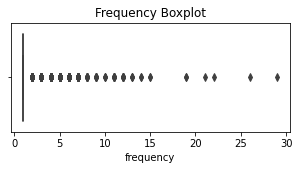

In [19]:
plt.figure(figsize=(5, 2))
sns.boxplot(x='frequency', data=rfm_df)
plt.title('Frequency Boxplot');

In [ ]:
# drop outliers which are outside the interquantile range
def drop_outliers(df, column):
    quantile1 = df[column].quantile(0.05)
    quantile3 = df[column].quantile(0.95)
    iqr = quantile3 - quantile1
    high_fence = quantile3 + 1.5 * iqr
    low_fence = quantile1 - 1.5 * iqr
    outliers_index = df.loc[(df[column] < low_fence) | (df[column] > high_fence)].index
    df = pd.DataFrame(df.drop(outliers_index.to_list(), axis=0, inplace=True))
    return df

In [21]:
drop_outliers(rfm_df, 'frequency')

""


Text(0.5, 1.0, 'Frequency Boxplot')

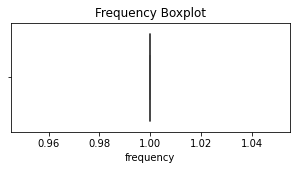

In [22]:
plt.figure(figsize=(5, 2))
sns.boxplot(x='frequency', data=rfm_df)
plt.title('Frequency Boxplot')

After dropping outliers, we are left with single value 1

In [23]:
rfm_df.shape

(94752, 3)

### Monetary

Text(0.5, 1.0, 'Monetary Boxplot')

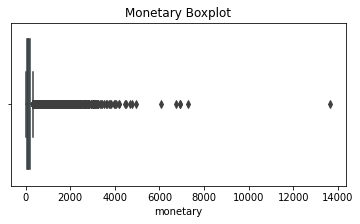

In [24]:
plt.figure(figsize=(6, 3))
sns.boxplot(x='monetary', data=rfm_df)
plt.title('Monetary Boxplot')

In [25]:
drop_outliers(rfm_df, 'monetary')

""


Text(0.5, 1.0, 'Monetary Boxplot')

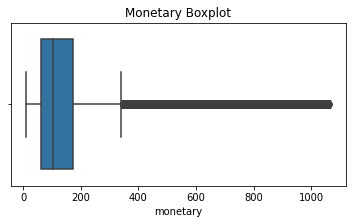

In [26]:
plt.figure(figsize=(6, 3))
sns.boxplot(x='monetary', data=rfm_df)
plt.title('Monetary Boxplot')

The boxplot looks cleaner after dropping the outliers

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18368\3531111811.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_df.monetary);


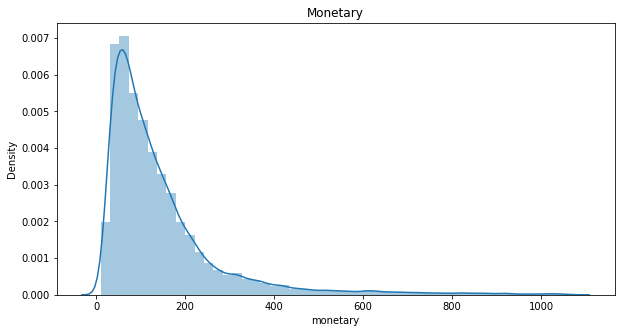

In [27]:
plt.figure(figsize=(10, 5))
plt.title('Monetary')
sns.distplot(rfm_df.monetary);

In [28]:
rfm_df.shape

(93837, 3)

### Assign Scores for each column

In [29]:
rfm_df["recency_score"] = pd.qcut(rfm_df['recency'], 5, labels=[5, 4, 3, 2, 1])
rfm_df["frequency_score"] = pd.qcut(rfm_df['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm_df["monetary_score"] = pd.qcut(rfm_df['monetary'], 5, labels=[1, 2, 3, 4, 5])

In [30]:
rfm_df['rfm_score'] = rfm_df.recency_score.astype(str) + rfm_df.frequency_score.astype(
    str) + rfm_df.monetary_score.astype(str)

In [31]:
rfm_df

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score
customer_id,,,,,,,
00012a2ce6f8dcda20d059ce98491703,299,1,114.74,2,1,3,213
000161a058600d5901f007fab4c27140,420,1,67.41,1,1,2,112
0001fd6190edaaf884bcaf3d49edf079,560,1,195.42,1,1,4,114
0002414f95344307404f0ace7a26f1d5,389,1,179.35,2,1,4,214
000379cdec625522490c315e70c7a9fb,161,1,107.01,4,1,3,413
...,...,...,...,...,...,...,...
fffb97495f78be80e2759335275df2aa,238,1,61.01,3,5,2,352
fffcb937e9dd47a13f05ecb8290f4d3e,179,1,91.91,4,5,3,453
fffeda5b6d849fbd39689bb92087f431,110,1,63.13,4,5,2,452


The segments mapped to the scores are obtained from bloomreach documentation - https://documentation.bloomreach.com/engagement/docs/rfm-segmentation

In [32]:
rfm_score_mappings = {
    r'155|154|144|214|215|115|114|113': 'Cannot Lose Them',
    r'255|254|245|244|253|252|243|242|235|234|225|224|153|152|145|143|142|135|134|133|125|124': 'At Risk',
    r'331|321|312|221|213|231|241|251': 'About To Sleep',
    r'535|534|443|434|343|334|325|324': 'Need Attention',
    r'543|444|435|355|354|345|344|335': 'Loyal',
    r'555|554|544|545|454|455|445': 'Champions'
                                    r'111|112|121|131|141|151': 'Lost customers',
r'332|322|233|232|223|222|132|123|122|212|211': 'Hibernating customers',
r'525|524|523|522|521|515|514|513|425|424|413|414|415|315|314|313': 'Promising',
r'512|511|422|421|412|411|311': 'New Customers',
r'553|551|552|541|542|533|532|531|452|451|442|441|431|453|433|432|423|353|352|351|342|341|333|323': 'Potential Loyalist'
}

In [33]:
# create rfm segments by using rfm score to segments mappings
rfm_df['segment'] = rfm_df['recency_score'].astype(str) + rfm_df['frequency_score'].astype(str) + rfm_df[
    'monetary_score'].astype(str)
rfm_df['segment'] = rfm_df['segment'].replace(rfm_score_mappings, regex=True)
rfm_df.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score,segment
customer_id,,,,,,,,
00012a2ce6f8dcda20d059ce98491703,299,1,114.74,2,1,3,213,About To Sleep
000161a058600d5901f007fab4c27140,420,1,67.41,1,1,2,112,Lost customers
0001fd6190edaaf884bcaf3d49edf079,560,1,195.42,1,1,4,114,Cannot Lose Them
0002414f95344307404f0ace7a26f1d5,389,1,179.35,2,1,4,214,Cannot Lose Them
000379cdec625522490c315e70c7a9fb,161,1,107.01,4,1,3,413,Promising


In [34]:
rfm_df['segment'].value_counts()

Potential Loyalist       17613
At Risk                  16487
Promising                12121
Hibernating customers     8366
Need Attention            6213
Loyal                     6058
About To Sleep            5962
Cannot Lose Them          5744
Champions                 5376
New Customers             5222
Lost customers            4675
Name: segment, dtype: int64

Text(0, 0.5, 'Customer Count')

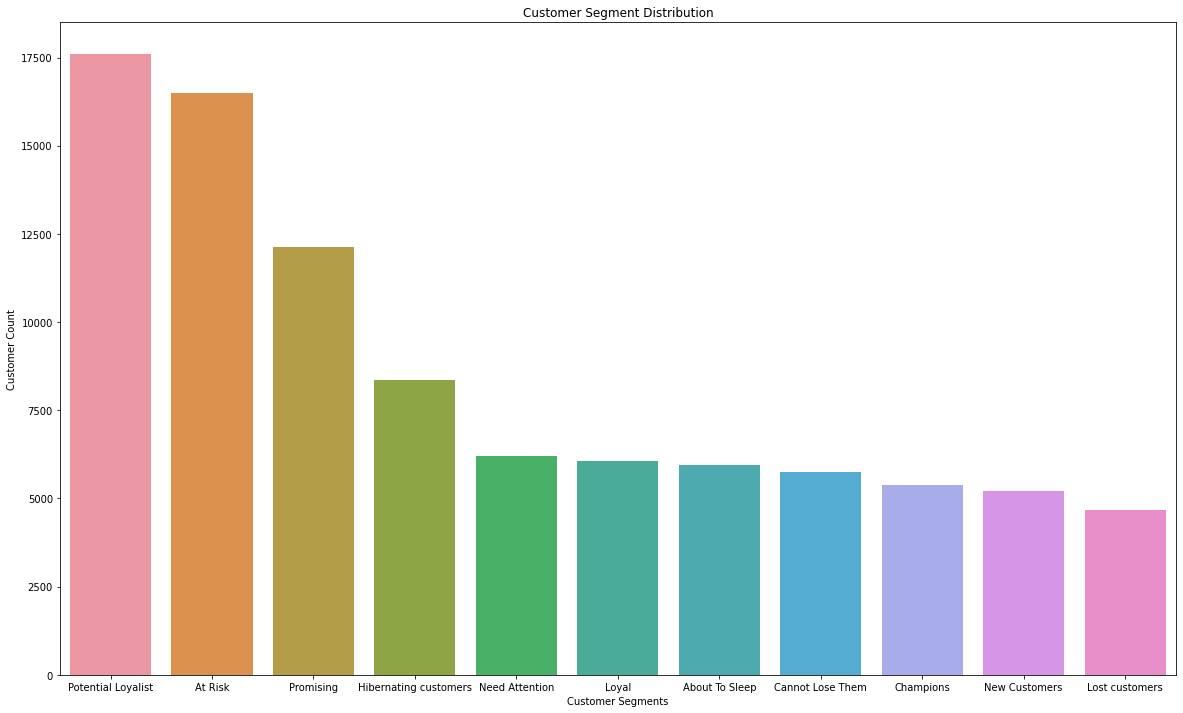

In [35]:
plt.figure(figsize=(20, 12))
plt.title('Customer Segment Distribution')
plt.xlabel('Customer Segments')
sns.barplot(x=rfm_df.segment.value_counts().index, y=rfm_df.segment.value_counts())
plt.ylabel('Customer Count')

#### The following table gives the customer segment description and suggested future action to effectively engage them

|Segment|	Activity|	Actionable Tip|
| --- | --- | --- |
Champions|	Bought recently, order often and spend the most.|	Reward them. Can be early adopters of new products. Will promote your brand. Most likely to send referrals.|
Loyal|	Orders regularly. Responsive to promotions.|	Upsell higher value products. Ask for reviews.|
Potential Loyalists|	Recent customers who spent good amounts.	|Offer membership / loyalty program. Keep them engaged. Offer personalized recommendations.|
New Customers|	Bought most recently.	|Provide on-boarding support, give them early access, start building relationship.|
Promising|	Potential loyalist a few months ago. Spends frequently and a good amount. But the last purchase was several weeks ago.	|Offer coupons. Bring them back to the platform and keep them engaged. Offer personalized recommendations.|
Need attention|	Core customers whose last purchase happened more than one month ago.	|Make limited time offers. Offer personalized recommendations.|
About to sleep|	Made their last purchase a long time ago but in the last 4 weeks either visited the site or opened an email.	|Make subject lines of emails very personalized. Revive their interest by a specific discount on a specific product.|
Cannot Lose Them|	Made the largest orders, and often. But haven’t returned for a long time.	|Win them back via renewals or newer products, don’t lose them to competition. Talk to them if necessary. Spend time on highest possible personalization.|
At Risk| Similar to 'Cannot Lose Them' but with smaller monetary and frequency value.	|Provide helpful resources on the site. Send personalized emails.|
Hibernating customers|	Customers who made smaller and infrequent purchases before but haven't purchased anything in a long time.	|Include them in your standard email communication but regularly check if they don't flag your content as spam. Do not overspend on this segment.|
Lost|	Made last purchase long time ago and didn’t engage at all in the last 4 weeks.|	Revive interest with reach out campaign. Ignore otherwise.|